Device: cuda
trainset size: 2
validset size: 0


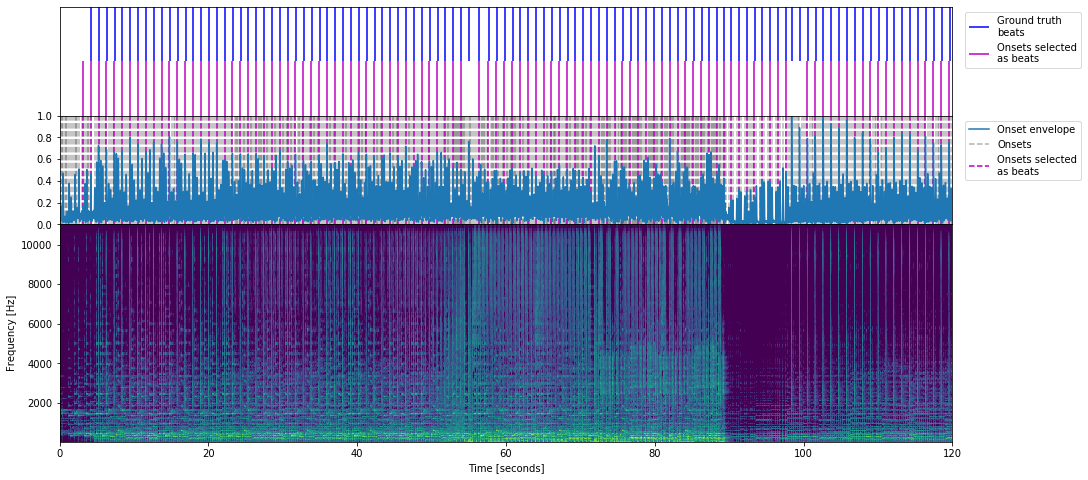

In [2]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

#model = beatfinder.model.BeatFinder()
#print(model)

audio_file = 'D:/Music/Lonely.wav'
beats_file = 'D:/Thesis/librosaPred.txt'

# Validation dataset
validset = beatfinder.data.AudioBeatsDatasetFromSong(audio_file, beats_file, 
                    precomputation_path='./data/abstract-datasets/selfmade/tmp/valid/',
                    duration=120, song_offset=130, song_duration=20)
# Training dataset with no data augmentaion
trainset_norm = beatfinder.data.AudioBeatsDatasetFromSong(audio_file, beats_file, 
                    precomputation_path='./data/abstract-datasets/selfmade/tmp/norm/',
                    duration=120, song_offset=0, song_duration=87)
# Make more training datasets with data augmentation
trainsets = [trainset_norm]
for i in range(2):
    trainset_aug = beatfinder.data.AudioBeatsDatasetFromSong(audio_file, beats_file, 
                    precomputation_path=f'./data/abstract-datasets/selfmade/tmp/aug{i}/',
                    duration=120, song_offset=0, song_duration=120)
    trainset_aug.augment()
    trainsets.append(trainset_aug)
trainset = beatfinder.data.ConcatAudioBeatsDataset(trainsets)

print(f'trainset size: {len(trainset)}')
print(f'validset size: {len(validset)}')


# Compute all spectrograms and onsets
trainset.precompute()
validset.precompute()

# Readjust the beats on the onsets.
trainset.correct()

dataset = trainset
i = np.random.randint(len(dataset))
audiobeats = dataset[i]
audiobeats.showdata(showpred=False)

In [6]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

#model = beatfinder.model.BeatFinder()
#print(model)

audio_file = 'D:/Music/Vexento.wav'
beats_file = 'D:/beatVexento.beats'

# Validation dataset
validset = beatfinder.data.AudioBeatsDatasetFromSong(audio_file, beats_file, 
                    precomputation_path='./data/abstract-datasets/selfmade/tmp/valid/',
                    duration=10, song_offset=0, song_duration=20)
# Training dataset with no data augmentaion
trainset_norm = beatfinder.data.AudioBeatsDatasetFromSong(audio_file, beats_file, 
                    precomputation_path='./data/abstract-datasets/selfmade/tmp/norm/',
                    duration=10, song_offset=0, song_duration=220)
# Make more training datasets with data augmentation
trainsets = [trainset_norm]
for i in range(2):
    trainset_aug = beatfinder.data.AudioBeatsDatasetFromSong(audio_file, beats_file, 
                    precomputation_path=f'./data/abstract-datasets/selfmade/tmp/aug{i}/',
                    duration=10, song_offset=0, song_duration=220)
    trainset_aug.augment()
    trainsets.append(trainset_aug)
trainset = beatfinder.data.ConcatAudioBeatsDataset(trainsets)

print(f'trainset size: {len(trainset)}')
print(f'validset size: {len(validset)}')

# Compute all spectrograms and onsets
trainset.precompute()
validset.precompute()

trainset.transform = totensor
validset.transform = totensor
model.train()
model.unfreeze()
model.set_lr(0.00005)
train_hist, valid_hist = model.fit(trainset, validset, batch_size=8, epochs=5)

model.eval()
model.freeze()
validset.transform = None
trainset.transform = None

audiobeats = validset[0]
audiobeats.predict(model, device)
audiobeats.showdata(beatfinder=model, device=device)

audiobeats = validset[1]
audiobeats.predict(model, device)
audiobeats.showdata(beatfinder=model, device=device)


Device: cuda
trainset size: 66
validset size: 2


KeyboardInterrupt: 

In [23]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

# HAINSWORTH Dataset

# Make a validation dataset
audio_files   = './data/raw-datasets/HAINSWORTH/valid_audio_files.txt'
where_to_save = './data/abstract-datasets/hainsworth/valid/'
dataset = beatfinder.data.AudioBeatsDatasetFromList(
            audio_files, where_to_save)
dataset.save(os.path.join(where_to_save, 'dataset.ab'))

# Make a training dataset
audio_files   = './data/raw-datasets/HAINSWORTH/train_audio_files.txt'

# no augmentation
where_to_save = './data/abstract-datasets/hainsworth/train/normal/'
dataset = beatfinder.data.AudioBeatsDatasetFromList(
            audio_files, where_to_save)
dataset.save(os.path.join(where_to_save, 'dataset.ab'))

# first augmented
where_to_save = './data/abstract-datasets/hainsworth/train/augmented_1/'
dataset = beatfinder.data.AudioBeatsDatasetFromList(
            audio_files, where_to_save)
dataset.augment()
dataset.save(os.path.join(where_to_save, 'dataset.ab'))

# second augmented
where_to_save = './data/abstract-datasets/hainsworth/train/augmented_2/'
dataset = beatfinder.data.AudioBeatsDatasetFromList(
            audio_files, where_to_save)
dataset.augment()
dataset.save(os.path.join(where_to_save, 'dataset.ab'))

In [26]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

#GTZAN Dataset

# Make a validation dataset
audio_files   = './data/raw-datasets/GTZAN/valid_audio_files.txt'
where_to_save = './data/abstract-datasets/gtzan/valid/'
dataset = beatfinder.data.AudioBeatsDatasetFromList(
            audio_files, where_to_save, force_nb_samples=3)
dataset.save(os.path.join(where_to_save, 'dataset.ab'))

# Make a training dataset
audio_files   = './data/raw-datasets/GTZAN/train_audio_files.txt'

# no augmentation
where_to_save = './data/abstract-datasets/gtzan/train/normal/'
dataset = beatfinder.data.AudioBeatsDatasetFromList(
            audio_files, where_to_save, force_nb_samples=3)
dataset.save(os.path.join(where_to_save, 'dataset.ab'))

# first augmented
where_to_save = './data/abstract-datasets/gtzan/train/augmented_1/'
dataset = beatfinder.data.AudioBeatsDatasetFromList(
            audio_files, where_to_save, force_nb_samples=3)
dataset.augment()
dataset.save(os.path.join(where_to_save, 'dataset.ab'))

# second augmented
where_to_save = './data/abstract-datasets/gtzan/train/augmented_2/'
dataset = beatfinder.data.AudioBeatsDatasetFromList(
            audio_files, where_to_save, force_nb_samples=3)
dataset.augment()
dataset.save(os.path.join(where_to_save, 'dataset.ab'))

In [29]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

trainset = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/train/augmented_2/dataset.ab')
validset = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/valid/dataset.ab')

print(f'trainset size: {len(trainset)}')
print(f'validset size: {len(validset)}')

trainset size: 1090
validset size: 56


trainset size: 3000
validset size: 90
2759/3000
         Name: rock.00019.002
Song duration: 31.42
      Stretch: 1.0469
       Offset: 6.7693


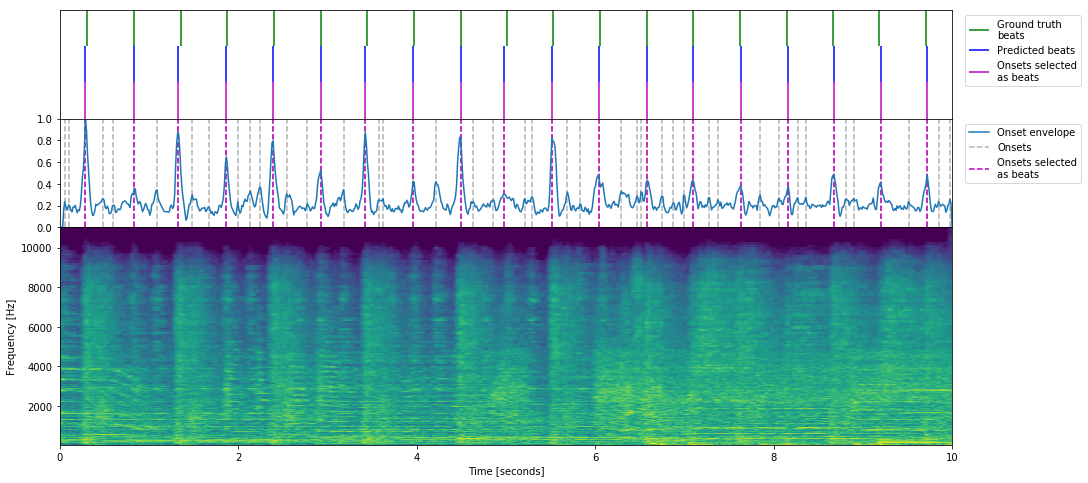

In [48]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

trainset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
validset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')

print(f'trainset size: {len(trainset)}')
print(f'validset size: {len(validset)}')

dataset = trainset
i = np.random.randint(len(dataset))
print(f'{i}/{len(dataset)}')
audiobeats = dataset[i]
print(f'         Name: {audiobeats.name}')
print(f'Song duration: {audiobeats.song_duration:.2f}')
print(f'      Stretch: {audiobeats.stretch:.4f}')
print(f'       Offset: {audiobeats.offset:.4f}')
beatfinder.display.showdata(audiobeats)

In [32]:
#DATASET GENERATION TEST ONLY
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

gtzan_validset      = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')
gtzan_trainset_norm = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/normal/dataset.ab')
gtzan_trainset_aug1 = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_1/dataset.ab')
gtzan_trainset_aug2 = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
gtzan_trainset      = gtzan_trainset_norm + gtzan_trainset_aug1 + gtzan_trainset_aug2
gtzan               = gtzan_validset + gtzan_trainset

hainsworth_validset      = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/valid/dataset.ab')
hainsworth_trainset_norm = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/train/normal/dataset.ab')
hainsworth_trainset_aug1 = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/train/augmented_1/dataset.ab')
hainsworth_trainset_aug2 = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/train/augmented_2/dataset.ab')
hainsworth_trainset      = hainsworth_trainset_norm + hainsworth_trainset_aug1 + hainsworth_trainset_aug2
hainsworth               = hainsworth_validset + hainsworth_trainset

trainset = gtzan + hainsworth
validset = hainsworth_validset

trainset.save('./data/abstract-datasets/tmp/trainset1.ab')
validset.save('./data/abstract-datasets/tmp/validset1.ab')

trainset.precompute()
validset.precompute()

trainset.clean()
trainset.save('./data/abstract-datasets/tmp/trainset-cleaned1.ab')

24 mini batches
24 learning rates


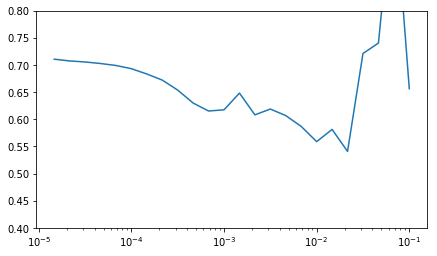

In [37]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

trainset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
validset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')

#Setup dataset for pytorch
trainset.transform = totensor
validset.transform = totensor

model = beatfinder.model.BeatFinder()
model.to(device)

dataloader = DataLoader(trainset, batch_size=128, shuffle=True)
n_mb = len(dataloader) # number of mini batches
print(f'{n_mb} mini batches')
lr = (10. ** -np.arange(1, 5, 4 / n_mb))[::-1]
print(f'{len(lr)} learning rates')

losses = np.zeros(n_mb)
for i, (specs, onsets, isbeat) in enumerate(dataloader):
    model.set_lr(lr[i])
    tn, fp, fn, tp, loss = model.learn(specs, onsets, isbeat)
    losses[i] = loss
    print(f'{i + 1}/{n_mb}', end='\r')
    
plt.figure(figsize=(7, 4))
plt.ylim(0.4, 0.8)
plt.semilogx(lr, losses);

In [1]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

trainset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
validset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')

#Setup dataset for pytorch
trainset.transform = totensor
validset.transform = totensor

model = beatfinder.model.BeatFinder(lr=0.005)
model.to(device)
print(model)
model.eval()
model.freeze()

tn, fp, fn, tp, loss = model.evaluate_from_dataset(validset)
beatfinder.display.confusion(tn, fp, fn, tp)
print(f'     Loss: {loss:.4f}')

model.unfreeze()
model.train()

train_hist, valid_hist = model.fit(trainset, validset, batch_size=8, epochs=30, early_stop=0.24)

torch.save(model.state_dict(), './data/pretrained-models/model_12Test2.pt')
np.save('./data/pretrained-models/model_12_train_histTest2.npy', train_hist)
np.save('./data/pretrained-models/model_12_valid_histTest2.npy', valid_hist)

a_train = np.zeros(12)
F_train = np.zeros(12)
a_valid = np.zeros(12)
F_valid = np.zeros(12)

plt.plot(a_train, label='train')
plt.plot(a_valid, label='valid')
plt.title('Accuracy')
plt.legend()


Device: cuda
BeatFinder(
  (lstm): LSTM(256, 256, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  (hid_to_beat): Linear(in_features=512, out_features=2, bias=True)
  (loss_function): NLLLoss()
)
 ---------------------
| tp:    0 | fp:    0 |
| fn: 1735 | tn: 3743 |
 ---------------------
 Accuracy: 0.6833
Precision: nan
   Recall: nan
F-measure: nan
     Loss: 0.6851
|  1 | L: 0.463 0.452 | F: 0.637 0.651 | A: 0.792 0.810 | 0.34 s/b | 0:02:06 | ETA: 0:39:58 |
|  2 | L: 0.449 0.505 | F: 0.653 0.512 | A: 0.798 0.757 | 0.33 s/b | 0:02:04 | ETA: 0:37:17 |
|  3 | L: 0.454 0.416 | F: 0.655 0.705 | A: 0.798 0.819 | 0.33 s/b | 0:02:03 | ETA: 0:35:01 |
|  4 | L: 0.426 0.410 | F: 0.683 0.754 | A: 0.812 0.831 | 0.33 s/b | 0:02:03 | ETA: 0:32:58 |
|  5 | L: 0.421 0.447 | F: 0.691 0.585 | A: 0.815 0.796 | 0.33 s/b | 0:02:03 | ETA: 0:30:55 |
|  6 | L: 0.430 0.431 | F: 0.680 0.725 | A: 0.809 0.810 | 0.33 s/b | 0:02:03 | ETA: 0:28:46 |
|  7 | L: 0.413 0.385 | F: 0.701 0.727 | A: 0.8

NameError: name 'a_train' is not defined

In [ ]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

device = torch.device('cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

trainset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
validset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')

#Setup dataset for pytorch
trainset.transform = totensor
validset.transform = totensor

model = beatfinder.model.BeatFinder(lr=0.005)
model.to(device)
print(model)
model.eval()
model.freeze()

tn, fp, fn, tp, loss = model.evaluate_from_dataset(validset)
beatfinder.display.confusion(tn, fp, fn, tp)
print(f'     Loss: {loss:.4f}')

model.unfreeze()
model.train()

train_hist, valid_hist = model.fit(trainset, validset, batch_size=128, epochs=30, early_stop=0.24)

torch.save(model.state_dict(), './data/pretrained-models/model_12Test.pt')
np.save('./data/pretrained-models/model_12_train_histTest.npy', train_hist)
np.save('./data/pretrained-models/model_12_valid_histTest.npy', valid_hist)



Device: cpu
BeatFinder(
  (lstm): LSTM(256, 256, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  (hid_to_beat): Linear(in_features=512, out_features=2, bias=True)
  (loss_function): NLLLoss()
)
 ---------------------
| tp:    0 | fp:    1 |
| fn: 1735 | tn: 3742 |
 ---------------------
 Accuracy: 0.6831
Precision: 0.0000
   Recall: 0.0000
F-measure: nan
     Loss: 0.6867


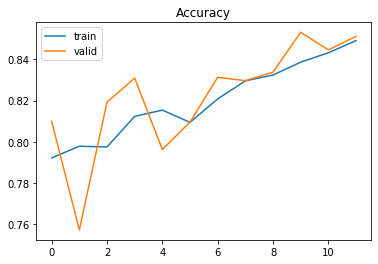

In [6]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

train_hist = np.load('C:/Users/buizo/beat-tracking-master/data/pretrained-models/model_12_train_histTest.npy')
valid_hist = np.load('C:/Users/buizo/beat-tracking-master/data/pretrained-models/model_12_valid_histTest.npy')

a_train = np.zeros(12)
F_train = np.zeros(12)
a_valid = np.zeros(12)
F_valid = np.zeros(12)

for e in range(12):
    tn = np.sum(train_hist[e, :, 0])
    fp = np.sum(train_hist[e, :, 1])
    fn = np.sum(train_hist[e, :, 2])
    tp = np.sum(train_hist[e, :, 3])
    a, p, r, F = beatfinder.utils.measures(tn, fp, fn, tp)
    a_train[e] = a
    F_train[e] = F
    
    tn = valid_hist[e, 0]
    fp = valid_hist[e, 1]
    fn = valid_hist[e, 2]
    tp = valid_hist[e, 3]
    a, p, r, F = beatfinder.utils.measures(tn, fp, fn, tp)
    
    a_valid[e] = a
    F_valid[e] = F
    
#plt.plot(F_train, label='train')
#plt.plot(F_valid, label='valid')
#plt.title('F measure')
#plt.legend()

plt.plot(a_train, label='train')
plt.plot(a_valid, label='valid')
plt.title('Accuracy')
plt.legend()


In [1]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

trainset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
validset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')

#Setup dataset for pytorch
trainset.transform = totensor
validset.transform = totensor

model = beatfinder.model.BeatFinder(lr=0.005)
model.to(device)
print(model)
model.eval()
model.freeze()

tn, fp, fn, tp, loss = model.evaluate_from_dataset(validset)
beatfinder.display.confusion(tn, fp, fn, tp)
print(f'     Loss: {loss:.4f}')

model.unfreeze()
model.train()

train_hist, valid_hist = model.fit(trainset, validset, batch_size=8, epochs=30, early_stop=0.24)

torch.save(model.state_dict(), './data/pretrained-models/model_12Test2.pt')
np.save('./data/pretrained-models/model_12_train_histTest2.npy', train_hist)
np.save('./data/pretrained-models/model_12_valid_histTest2.npy', valid_hist)

#a_train = np.zeros(12)
#F_train = np.zeros(12)
#a_valid = np.zeros(12)
#F_valid = np.zeros(12)

#plt.plot(a_train, label='train')
#plt.plot(a_valid, label='valid')
#plt.title('Accuracy')
#plt.legend()

Device: cuda
BeatFinder(
  (lstm): LSTM(256, 256, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  (hid_to_beat): Linear(in_features=512, out_features=2, bias=True)
  (loss_function): NLLLoss()
)
 ---------------------
| tp: 1735 | fp: 3727 |
| fn:    0 | tn:   16 |
 ---------------------
 Accuracy: 0.3196
Precision: 0.3176
   Recall: 1.0000
F-measure: 0.4821
     Loss: 0.6983
|  1 | L: 0.468 0.408 | F: 0.634 0.704 | A: 0.788 0.811 | 0.33 s/b | 0:02:03 | ETA: 0:59:34 |
|  2 | L: 0.424 0.374 | F: 0.683 0.730 | A: 0.813 0.827 | 0.33 s/b | 0:02:03 | ETA: 0:57:34 |
|  3 | L: 0.385 0.367 | F: 0.723 0.759 | A: 0.834 0.843 | 0.33 s/b | 0:02:03 | ETA: 0:55:28 |
|  4 | L: 0.372 0.332 | F: 0.738 0.753 | A: 0.841 0.853 | 0.33 s/b | 0:02:03 | ETA: 0:53:25 |
|  5 | L: 0.366 0.335 | F: 0.741 0.743 | A: 0.844 0.844 | 0.33 s/b | 0:02:03 | ETA: 0:51:20 |
|  6 | L: 0.353 0.319 | F: 0.753 0.785 | A: 0.850 0.862 | 0.33 s/b | 0:02:03 | ETA: 0:49:22 |
|  7 | L: 0.348 0.338 | F: 0.759 0.765

In [2]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

#trainset = beatfinder.data.load_dataset('./data/abstract-datasets/tmp/trainset-cleaned1.ab')
#validset = beatfinder.data.load_dataset('./data/abstract-datasets/tmp/validset1.ab')

trainset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
validset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')

#Setup dataset for pytorch
trainset.transform = totensor
validset.transform = totensor

model = beatfinder.model.BeatFinder(lr=0.0005)
model.to(device)
print(model)
model.eval()
model.freeze()

tn, fp, fn, tp, loss = model.evaluate_from_dataset(validset)
beatfinder.display.confusion(tn, fp, fn, tp)
print(f'     Loss: {loss:.4f}')

model.unfreeze()
model.train()

train_hist, valid_hist = model.fit(trainset, validset, batch_size=8, epochs=50, early_stop=0.24)

torch.save(model.state_dict(), './data/pretrained-models/model_12Test4.pt')
np.save('./data/pretrained-models/model_12_train_histTest4.npy', train_hist)
np.save('./data/pretrained-models/model_12_valid_histTest4.npy', valid_hist)

#a_train = np.zeros(12)
#F_train = np.zeros(12)
#a_valid = np.zeros(12)
#F_valid = np.zeros(12)

#plt.plot(a_train, label='train')
#plt.plot(a_valid, label='valid')
#plt.title('Accuracy')
#plt.legend()

Device: cuda
BeatFinder(
  (lstm): LSTM(256, 256, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  (hid_to_beat): Linear(in_features=512, out_features=2, bias=True)
  (loss_function): NLLLoss()
)
 ---------------------
| tp: 1527 | fp: 3483 |
| fn:  208 | tn:  260 |
 ---------------------
 Accuracy: 0.3262
Precision: 0.3048
   Recall: 0.8801
F-measure: 0.4528
     Loss: 0.6980
|  1 | L: 0.468 0.391 | F: 0.631 0.737 | A: 0.784 0.823 | 0.41 s/b | 0:02:34 | ETA: 2:06:10 |
|  2 | L: 0.409 0.366 | F: 0.701 0.743 | A: 0.821 0.841 | 0.33 s/b | 0:02:05 | ETA: 1:40:20 |
|  3 | L: 0.389 0.350 | F: 0.724 0.769 | A: 0.834 0.849 | 0.33 s/b | 0:02:04 | ETA: 1:37:21 |
|  4 | L: 0.378 0.382 | F: 0.731 0.747 | A: 0.837 0.827 | 0.33 s/b | 0:02:04 | ETA: 1:35:20 |
|  5 | L: 0.393 0.703 | F: 0.714 0.577 | A: 0.829 0.574 | 0.33 s/b | 0:02:03 | ETA: 1:32:37 |
|  6 | L: 0.434 0.371 | F: 0.676 0.743 | A: 0.809 0.840 | 0.33 s/b | 0:02:03 | ETA: 1:30:36 |
|  7 | L: 0.435 0.406 | F: 0.676 0.716

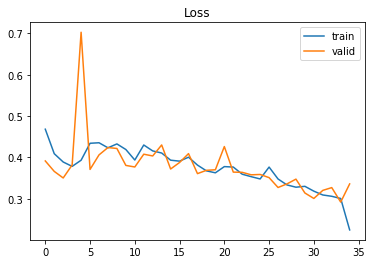

In [9]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

train_hist = np.load('C:/Users/buizo/beat-tracking-master/data/pretrained-models/model_12_train_histTest2.npy')
valid_hist = np.load('C:/Users/buizo/beat-tracking-master/data/pretrained-models/model_12_valid_histTest2.npy')

plt.plot(np.mean(train_hist[:35, :, 4], axis=1), label='train')
plt.plot(valid_hist[:35, 4], label='valid')
plt.title('Loss')
plt.legend();

In [2]:
#DATASET GENERATION TEST ONLY
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

gtzan_validset      = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')
gtzan_trainset_norm = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/normal/dataset.ab')
gtzan_trainset_aug1 = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_1/dataset.ab')
gtzan_trainset_aug2 = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
gtzan_trainset      = gtzan_trainset_norm + gtzan_trainset_aug1 + gtzan_trainset_aug2
gtzan               = gtzan_validset + gtzan_trainset

hainsworth_validset      = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/valid/dataset.ab')
hainsworth_trainset_norm = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/train/normal/dataset.ab')
hainsworth_trainset_aug1 = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/train/augmented_1/dataset.ab')
hainsworth_trainset_aug2 = beatfinder.data.load_dataset('./data/abstract-datasets/hainsworth/train/augmented_2/dataset.ab')
hainsworth_trainset      = hainsworth_trainset_norm + hainsworth_trainset_aug1 + hainsworth_trainset_aug2
hainsworth               = hainsworth_validset + hainsworth_trainset

smc_validset      = beatfinder.data.load_dataset('./data/abstract-datasets/smc/valid/dataset.ab')
smc_trainset_norm = beatfinder.data.load_dataset('./data/abstract-datasets/smc/train/normal/dataset.ab')
smc_trainset_aug1 = beatfinder.data.load_dataset('./data/abstract-datasets/smc/train/augmented_1/dataset.ab')
smc_trainset_aug2 = beatfinder.data.load_dataset('./data/abstract-datasets/smc/train/augmented_2/dataset.ab')
smc_trainset      = smc_trainset_norm + smc_trainset_aug1 + smc_trainset_aug2
smc               = smc_validset + smc_trainset


trainset = gtzan + hainsworth + smc
validset = hainsworth_validset

trainset.save('./data/abstract-datasets/tmp/trainset1.ab')
validset.save('./data/abstract-datasets/tmp/validset1.ab')

#trainset.precompute()
#validset.precompute()

trainset.clean()
trainset.save('./data/abstract-datasets/tmp/trainset-cleaned1.ab')

In [ ]:
import beatfinder
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

trainset = beatfinder.data.load_dataset('./data/abstract-datasets/tmp/trainset-cleaned1.ab')
validset = beatfinder.data.load_dataset('./data/abstract-datasets/tmp/validset1.ab')

#trainset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/train/augmented_2/dataset.ab')
#validset = beatfinder.data.load_dataset('./data/abstract-datasets/gtzan/valid/dataset.ab')

#Setup dataset for pytorch
trainset.transform = totensor
validset.transform = totensor

model = beatfinder.model.BeatFinder(lr=0.0005)
model.to(device)
print(model)
model.eval()
model.freeze()

tn, fp, fn, tp, loss = model.evaluate_from_dataset(validset)
beatfinder.display.confusion(tn, fp, fn, tp)
print(f'     Loss: {loss:.4f}')

model.unfreeze()
model.train()

train_hist, valid_hist = model.fit(trainset, validset, batch_size=8, epochs=50, early_stop=0.24)

torch.save(model.state_dict(), './data/pretrained-models/model_12Test4.pt')
np.save('./data/pretrained-models/model_12_train_histTest4.npy', train_hist)
np.save('./data/pretrained-models/model_12_valid_histTest4.npy', valid_hist)

#a_train = np.zeros(12)
#F_train = np.zeros(12)
#a_valid = np.zeros(12)
#F_valid = np.zeros(12)

#plt.plot(a_train, label='train')
#plt.plot(a_valid, label='valid')
#plt.title('Accuracy')
#plt.legend()

Device: cuda
BeatFinder(
  (lstm): LSTM(256, 256, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  (hid_to_beat): Linear(in_features=512, out_features=2, bias=True)
  (loss_function): NLLLoss()
)
 ---------------------
| tp:  763 | fp: 2502 |
| fn:    0 | tn:    0 |
 ---------------------
 Accuracy: 0.2337
Precision: 0.2337
   Recall: 1.0000
F-measure: 0.3788
     Loss: 0.7099
